In [1]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
from numpy.lib.scimath import sqrt

In [2]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True)
h = sp.Symbol('hbar', real = True, positive = True)
w = sp.Symbol('omega', real = True, positive = True)
m = sp.Symbol('m', real = True, positive = True)
p = sp.Function('psi')
C = sp.Symbol('C', real = True)

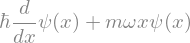

In [3]:

eq = h * p(x).diff(x) + m * w * x * p(x)
eq

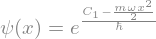

In [4]:
res = sp.dsolve(eq, p(x))
res

In [5]:
res.rhs.simplify()

In [6]:
res = C * sp.exp(- m * w * x**2 / (2 * h))
res

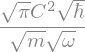

In [7]:
sp.integrate(res**2, (x, -sp.oo, +sp.oo))

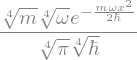

In [23]:
psi0 = res.subs(C, (m * w / (sp.pi * h))**sp.Rational(1, 4))
psi0

In [10]:
def aplus(psi):
    return (-h * psi.diff(x) + m * w * x * psi) / sp.sqrt(2 * m * h * w)

In [11]:
def psin(psi, n):
    return aplus(psi) / sp.sqrt(n + 1)

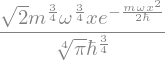

In [15]:
psi1 = psin(psi0, 0)
psi1

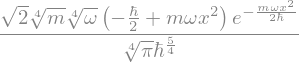

In [21]:
psi2 = psin(psi1, 1).simplify()
psi2

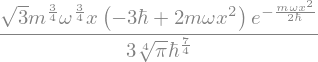

In [20]:
psi3 = psin(psi2, 2).simplify()
psi3

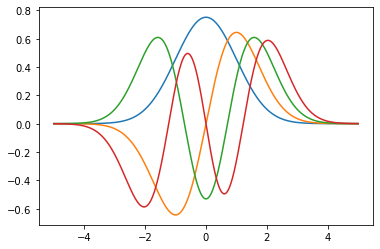

In [41]:
xs = np.linspace(-5, 5, 1000)
plt.plot(xs, lambdify(x, psi0.subs({m : 1, w : 1, h : 1}))(xs))
plt.plot(xs, lambdify(x, psi1.subs({m : 1, w : 1, h : 1}))(xs))
plt.plot(xs, lambdify(x, psi2.subs({m : 1, w : 1, h : 1}))(xs))
plt.plot(xs, lambdify(x, psi3.subs({m : 1, w : 1, h : 1}))(xs))

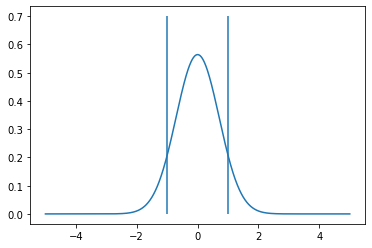

In [40]:
xs = np.linspace(-5, 5, 1000)
plt.plot(xs, lambdify(x, psi0.subs({m : 1, w : 1, h : 1}))(xs)**2)
plt.vlines(-np.sqrt(1), 0, 0.7)
plt.vlines(np.sqrt(1), 0, 0.7)
#plt.plot(xs, lambdify(x, psi1.subs({m : 1, w : 1, h : 1}))(xs))
#plt.plot(xs, lambdify(x, psi2.subs({m : 1, w : 1, h : 1}))(xs))
#plt.plot(xs, lambdify(x, psi3.subs({m : 1, w : 1, h : 1}))(xs))